# Disciplina de Aprendizado de Máquina não supervisionado

## Aula 03

### Parte I: Revisitando conjuntos de dados



In [235]:
# instala algumas bibliotecas necessárias (caso não tenha instalado ou reinicialize o collab)
!pip install scikit-learn-extra fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Na aula anterior, verificamos que **algoritmos baseados em centroides** como o `k-means` não conseguem identificar apropriadamente a estrutura de alguns conjuntos de dados, justamente porque eles não são isométricos (i.e., não possuem uma forma ou estrutura bem definida, em especial em termos de espacialidade). 

Os algoritmos dessa adequam-se quando os dados agrupam-se de maneira esférica ou circular em torno de um centro de gravidade (o centroide), i.e., há um raio de atuação desse centro de gravidade, em todas as dimensões, e um elemento só é considerado parte de um `conglomerado` quando ele está dentro desse raio. Portanto, quando um elemento fica fora desse raio ele não é alocado no mesmo `cluster`. Um efeito disso é que elementos que estejam dentro desse raio, mas que não sejam coesos com os demais ou que estejam em uma densidade espacial diferente, podem acabar (incorretamente) no mesmo `cluster`. 

A seguir podemos verificar alguns conjuntos de dados que possuem elementos com essas características:

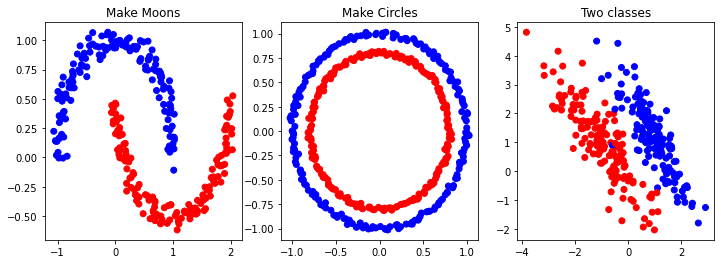

In [236]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib import pyplot 
from pandas import DataFrame 

fig, (ax1, ax2, ax3) = pyplot.subplots(1,3, figsize=(12,4))

elementos1, classes1 = make_moons(n_samples=300, noise=0.06)
ax1.scatter(elementos1[:,0], y=elementos1[:,1], label=classes1, c=classes1, cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Make Moons")
df_moons = DataFrame(dict(x=elementos1[:,0], y=elementos1[:,1], classe=classes1))

elementos2, classes2 = make_circles(n_samples=400, noise=0.015)
ax2.scatter(elementos2[:,0], y=elementos2[:,1], label=classes2, c=classes2,cmap=pyplot.get_cmap('bwr'))
ax2.set_title("Make Circles")
df_circles = DataFrame(dict(x=elementos2[:,0], y=elementos2[:,1], classe=classes2))

elementos3, classes3 = make_classification(n_samples=300, n_features=2, n_clusters_per_class=1, random_state=3, n_informative=2, n_redundant=0)
ax3.scatter(elementos3[:,0], y=elementos3[:,1], label=classes3, c=classes3, cmap=pyplot.get_cmap('bwr'))
ax3.set_title("Two classes")
df_classification = DataFrame(dict(x=elementos3[:,0], y=elementos3[:,1], classe=classes3))

pyplot.show()

Os resultados dos algoritmos `k-means`, `k-medoids` e `fc-means`, ao menos em suas versões padrão, seriam os seguintes:

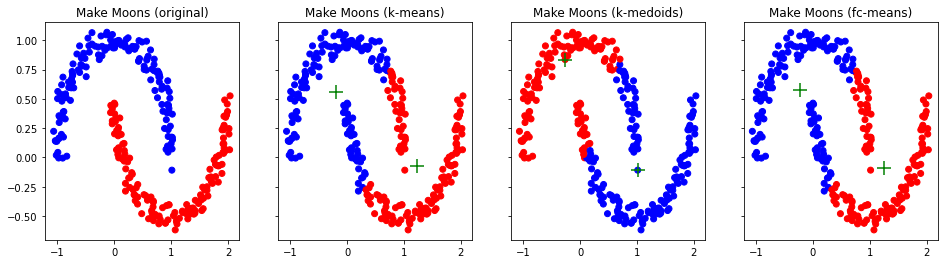

In [237]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from fcmeans import FCM
from matplotlib import pyplot 

km_model = KMeans(n_clusters=2, init="k-means++", n_init=100, max_iter=1000, random_state=0).fit(elementos1)
df_moons['k-means'] = km_model.labels_
df_moons['k-means'].replace((0,1),(1,0),inplace=True)

kmd_model = KMedoids(n_clusters=2, max_iter=1000, random_state=0).fit(elementos1)
df_moons['k-medoids'] = kmd_model.labels_
df_moons['k-medoids'].replace((0,1),(1,0),inplace=True)

fc_model = FCM(n_clusters=2)
fc_model.fit(elementos1)
df_moons['fc-means'] = fc_model.predict(elementos1)
df_moons['fc-means'].replace((0,1),(1,0),inplace=True)

fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(1, 4, sharey=True, figsize=(16,4))
ax1.scatter(df_moons['x'], df_moons['y'], c=df_moons['classe'], cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Make Moons (original)")

ax2.scatter(df_moons['x'], df_moons['y'], c=df_moons['k-means'], cmap=pyplot.get_cmap('bwr'))
ax2.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], c="green", marker="+", s=200)
ax2.set_title("Make Moons (k-means)")

ax3.scatter(df_moons['x'], df_moons['y'], c=df_moons['k-medoids'], cmap=pyplot.get_cmap('bwr'))
ax3.scatter(kmd_model.cluster_centers_[:,0], kmd_model.cluster_centers_[:,1], c="green", marker="+", s=200)
ax3.set_title("Make Moons (k-medoids)")

ax4.scatter(df_moons['x'], df_moons['y'], c=df_moons['fc-means'], cmap=pyplot.get_cmap('bwr'))
ax4.scatter(fc_model.centers[:,0], fc_model.centers[:,1], c="green", marker="+", s=200)
ax4.set_title("Make Moons (fc-means)")

pyplot.show()

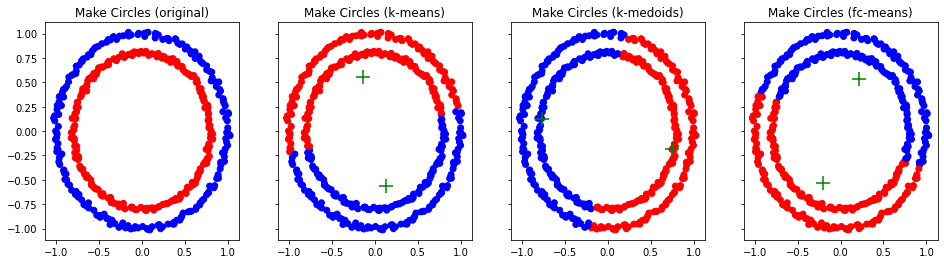

In [238]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from fcmeans import FCM
from matplotlib import pyplot 

km_model = KMeans(n_clusters=2, init="k-means++", n_init=100, max_iter=1000, random_state=0).fit(elementos2)
df_circles['k-means'] = km_model.labels_
#df_circles['k-means'].replace((0,1),(1,0),inplace=True)

kmd_model = KMedoids(n_clusters=2, max_iter=1000, random_state=0).fit(elementos2)
df_circles['k-medoids'] = kmd_model.labels_
#df_circles['k-medoids'].replace((0,1),(1,0),inplace=True)

fc_model = FCM(n_clusters=2)
fc_model.fit(elementos2)
df_circles['fc-means'] = fc_model.predict(elementos2)
df_circles['fc-means'].replace((0,1),(1,0),inplace=True)

fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(1, 4, sharey=True, figsize=(16,4))
ax1.scatter(df_circles['x'], df_circles['y'], c=df_circles['classe'], cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Make Circles (original)")

ax2.scatter(df_circles['x'], df_circles['y'], c=df_circles['k-means'], cmap=pyplot.get_cmap('bwr'))
ax2.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], c="green", marker="+", s=200)
ax2.set_title("Make Circles (k-means)")

ax3.scatter(df_circles['x'], df_circles['y'], c=df_circles['k-medoids'], cmap=pyplot.get_cmap('bwr'))
ax3.scatter(kmd_model.cluster_centers_[:,0], kmd_model.cluster_centers_[:,1], c="green", marker="+", s=200)
ax3.set_title("Make Circles (k-medoids)")

ax4.scatter(df_circles['x'], df_circles['y'], c=df_circles['fc-means'], cmap=pyplot.get_cmap('bwr'))
ax4.scatter(fc_model.centers[:,0], fc_model.centers[:,1], c="green", marker="+", s=200)
ax4.set_title("Make Circles (fc-means)")

pyplot.show()

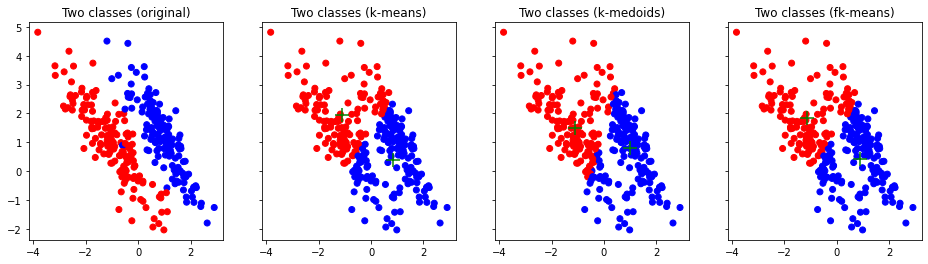

In [239]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from fcmeans import FCM
from matplotlib import pyplot 

km_model = KMeans(n_clusters=2, init="k-means++", n_init=100, max_iter=1000, random_state=0).fit(elementos3)
df_classification['k-means'] = km_model.labels_
df_classification['k-means'].replace((0,1),(1,0),inplace=True)

kmd_model = KMedoids(n_clusters=2, max_iter=1000, random_state=0).fit(elementos3)
df_classification['k-medoids'] = kmd_model.labels_
#df_classification['k-medoids'].replace((0,1),(1,0),inplace=True)

fc_model = FCM(n_clusters=2)
fc_model.fit(elementos3)
df_classification['fc-means'] = fc_model.predict(elementos3)
df_classification['fc-means'].replace((0,1),(1,0),inplace=True)

fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(1, 4, sharey=True, figsize=(16,4))
ax1.scatter(df_classification['x'], df_classification['y'], c=df_classification['classe'], cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Two classes (original)")

ax2.scatter(df_classification['x'], df_classification['y'], c=df_classification['k-means'], cmap=pyplot.get_cmap('bwr'))
ax2.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], c="green", marker="+", s=200)
ax2.set_title("Two classes (k-means)")

ax3.scatter(df_classification['x'], df_classification['y'], c=df_classification['k-medoids'], cmap=pyplot.get_cmap('bwr'))
ax3.scatter(kmd_model.cluster_centers_[:,0], kmd_model.cluster_centers_[:,1], c="green", marker="+", s=200)
ax3.set_title("Two classes (k-medoids)")

ax4.scatter(df_classification['x'], df_classification['y'], c=df_classification['fc-means'], cmap=pyplot.get_cmap('bwr'))
ax4.scatter(fc_model.centers[:,0], fc_model.centers[:,1], c="green", marker="+", s=200)
ax4.set_title("Two classes (fk-means)")

pyplot.show()

### Parte II: Clustering baseado em Modelos de Distribuição

Uma possível melhoria consiste em analisar a distribuição dos dados e considerar algum modelo de distribuição como base, por exemplo, a [Distribuição Normal (Gaussiana)](https://www.inf.ufsc.br/~andre.zibetti/probabilidade/normal.html). Obviamente qualquer outro tipo de distribuição pode ser utilizado (e.g., Poisson, Exponencial, Gamma, Dirichlet...), mas vamos utilizar um dos que está disponível na biblioteca `scikit-learn`, em Python: o `Gaussian Mixture Model` (GMM). 

O problema dele é que justamente ele parte do princípio de que os dados seguem uma distribuição normal (Gaussiana). E para ser aplicado, ele necessita de dois parâmetros adicionais: a média e a covariância. Ele os usa para calcular, descrever a posição e o formato de cada *cluster*. 

Ele inicia calculando a probabilidade de que dado elemento venha da mistura de distribuições gaussianas com o conjunto atual de parâmetros. Em seguida, maximiza essa probabilidade, alterando os parâmetros.

Ele também é um algoritmo do tipo *Expectation - Maximization*. Durante a fase de `expectativa`, sem atribuir um elemento a um cluster, ele calcula a probabilidade de que os parâmetros de cada cluster gerem cada ponto de dados. Isso significa recalcular para cada iteração um novo valor de probabilidades. Durante a `maximização`, ele atualiza o peso, a média e a covariancia para cada cluster. 

O GMM tem 5 etapas:

1. Escolher o número de clusters (`k`)
2. Estabelecer aleatoriamente os parâmetros iniciais para cada centroide (ou seja, a média, covariância e o peso ou ponderação)
3. Calcular a probabilidade de que o conjunto de dados tenha vindo desse conjunto de clusters com os parâmetros atuais
4. Maximizar a probabilidade alterando os parâmetros (proporções de cluster, centros e dispersão em torno dos centros)
5. Retornar à etapa 3 e repetir até que a alteração nos parâmetros seja menor que um valor pré-definido ou um número fixo de iterações tenha sido concluído.

Ao contrário dos algoritmos baseados em centroides, o `GMM` não utiliza uma medida de distância; ele aplica uma distribuição de probabilidades em torno dos centroides para determinar a probabilidade de um elemento de dados pertencer a um determinado *cluster*. Como o próprio nome do algoritmo indica, essa é uma distribuição normal multivariada com o número de variáveis igual ao número de dimensões nos dados. 

Com isso, os *clusters* podem ter contornos elipsoidais ao invés de circulares.

Vamos fazer alguns testes:

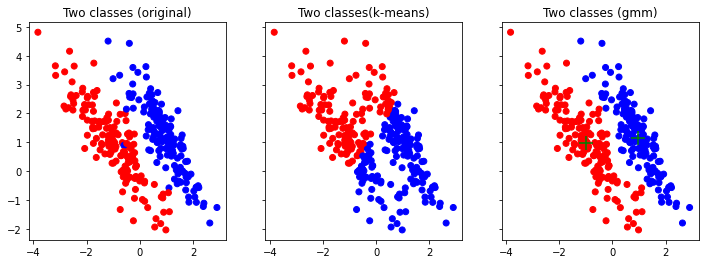

In [240]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot 

gm_model = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="full")
df_classification['gmm'] = gm_model.fit_predict(elementos3)

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.scatter(df_classification['x'], df_classification['y'], c=df_classification['classe'], cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Two classes (original)")

ax2.scatter(df_classification['x'], df_classification['y'], c=df_classification['k-means'], cmap=pyplot.get_cmap('bwr'))
ax2.set_title("Two classes(k-means)")

ax3.scatter(df_classification['x'], df_classification['y'], c=df_classification['gmm'], cmap=pyplot.get_cmap('bwr'))
ax3.scatter(gm_model.means_[:,0], gm_model.means_[:,1], c="green", marker="+", s=200)
ax3.set_title("Two classes (gmm)")

pyplot.show()

**Exercício 1**: a seguir, utilizando como base o *script* da célula enterior (e os anteriores, se necessário), aplique o algoritmo `GMM` nos outros 2 *datasets* criados anteriormente (`make moons` e `make circles`). Compare (visualmente) o resultado obtido pelo `GMM` com as classes originais. Tente ajustar o modelo de maneira a obter o melhor resultado possível. O modelo tem vários ajustes que podem ser feitos. Analise os diferentes parâmetros, observando a [página disponível neste link](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). Se necessário, leia ainda a [página que explica os Gaussian Mixture Models](https://scikit-learn.org/stable/modules/mixture.html)

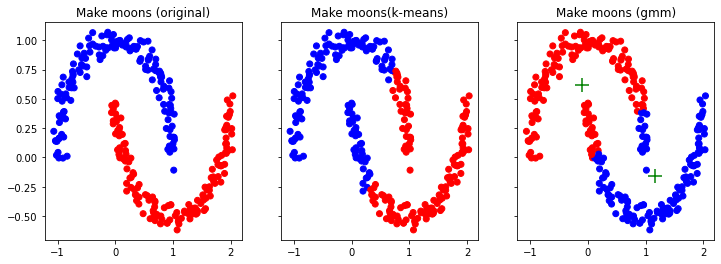

In [241]:
# make moons
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot 

gm_model = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="full")
df_moons['gmm'] = gm_model.fit_predict(elementos1)

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.scatter(df_moons['x'], df_moons['y'], c=df_moons['classe'], cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Make moons (original)")

ax2.scatter(df_moons['x'], df_moons['y'], c=df_moons['k-means'], cmap=pyplot.get_cmap('bwr'))
ax2.set_title("Make moons(k-means)")

ax3.scatter(df_moons['x'], df_moons['y'], c=df_moons['gmm'], cmap=pyplot.get_cmap('bwr'))
ax3.scatter(gm_model.means_[:,0], gm_model.means_[:,1], c="green", marker="+", s=200)
ax3.set_title("Make moons (gmm)")

pyplot.show()

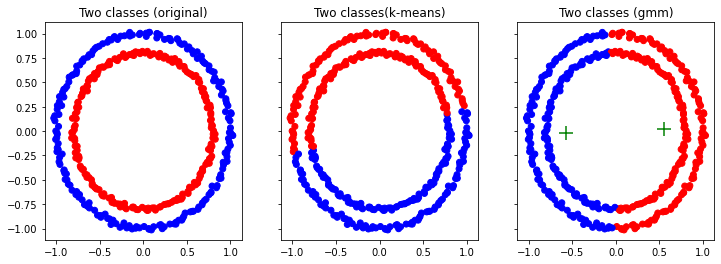

In [242]:
# make circles
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot 

# elementos1, classes1 = make_moons(n_samples=300, noise=0.06)
# ax1.scatter(elementos1[:,0], y=elementos1[:,1], label=classes1, c=classes1, cmap=pyplot.get_cmap('bwr'))
# ax1.set_title("Make Moons")
# df_moons = DataFrame(dict(x=elementos1[:,0], y=elementos1[:,1], classe=classes1))

gm_model = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="full")
df_circles['gmm'] = gm_model.fit_predict(elementos2)

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.scatter(df_circles['x'], df_circles['y'], c=df_circles['classe'], cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Two classes (original)")

ax2.scatter(df_circles['x'], df_circles['y'], c=df_circles['k-means'], cmap=pyplot.get_cmap('bwr'))
ax2.set_title("Two classes(k-means)")

ax3.scatter(df_circles['x'], df_circles['y'], c=df_circles['gmm'], cmap=pyplot.get_cmap('bwr'))
ax3.scatter(gm_model.means_[:,0], gm_model.means_[:,1], c="green", marker="+", s=200)
ax3.set_title("Two classes (gmm)")

pyplot.show()

In [243]:
# função util para comparar algoritimos
def util_grafico_comparacao_gmm(label, df):
  fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, sharey=True, figsize=(12,4))
  ax1.scatter(df['x'], df['y'], c=df['classe'], cmap=pyplot.get_cmap('bwr'))
  ax1.set_title(label + " (original)")

  ax2.scatter(df['x'], df['y'], c=df['k-means'], cmap=pyplot.get_cmap('bwr'))
  ax2.set_title(label + "(k-means)")

  ax3.scatter(df['x'], df['y'], c=df['gmm'], cmap=pyplot.get_cmap('bwr'))
  ax3.scatter(gm_model.means_[:,0], gm_model.means_[:,1], c="green", marker="+", s=200)
  ax3.set_title(label + " (gmm)")

  pyplot.show()


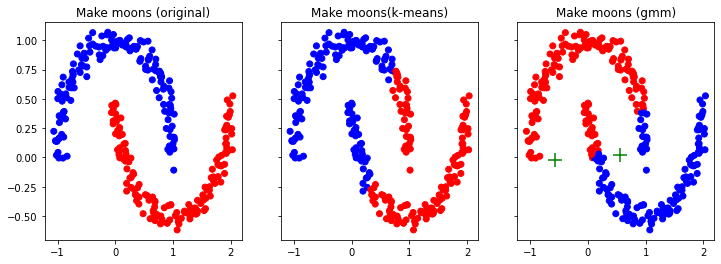

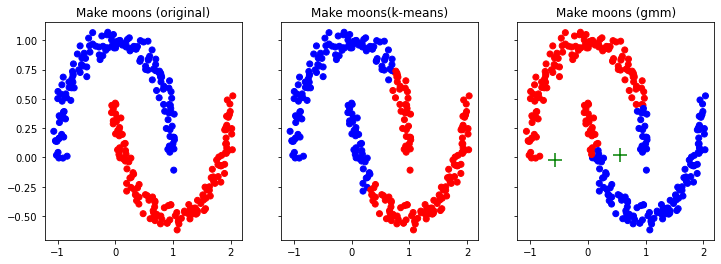

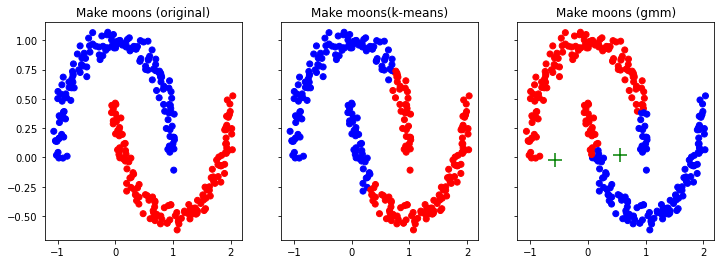

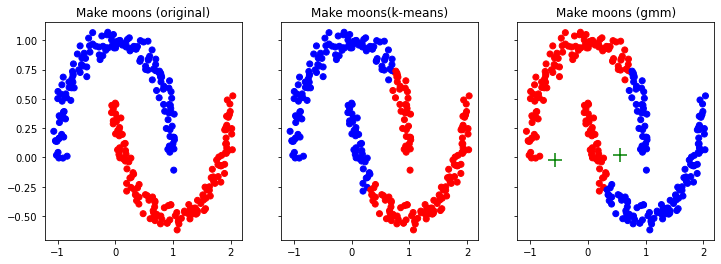

In [244]:
# make moons + gmm
gm_model_full = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="full")
df_moons['gmm'] = gm_model_full.fit_predict(elementos1)

util_grafico_comparacao_gmm("Make moons", df_moons)

# variando entradas covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’},
gm_model_tied = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="tied")
df_moons['gmm'] = gm_model_tied.fit_predict(elementos1)
util_grafico_comparacao_gmm("Make moons", df_moons)

gm_model_diag = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="diag")
df_moons['gmm'] = gm_model_diag.fit_predict(elementos1)
util_grafico_comparacao_gmm("Make moons", df_moons)

gm_model_spherical = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="spherical")
df_moons['gmm'] = gm_model_spherical.fit_predict(elementos1)
util_grafico_comparacao_gmm("Make moons", df_moons)

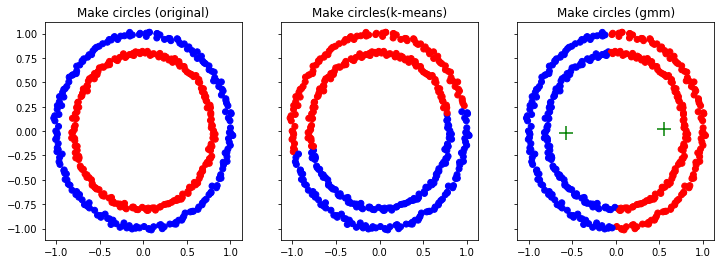

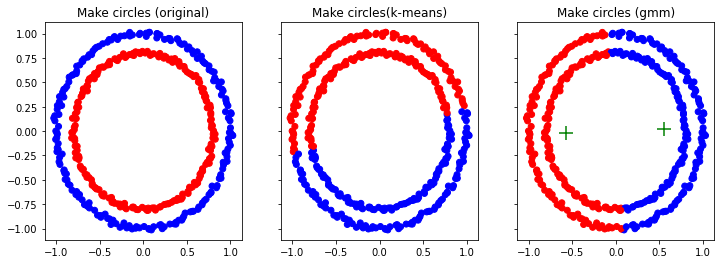

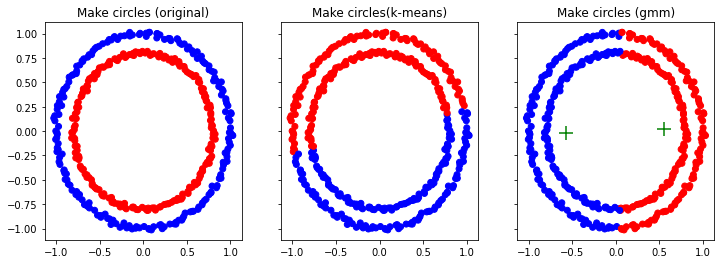

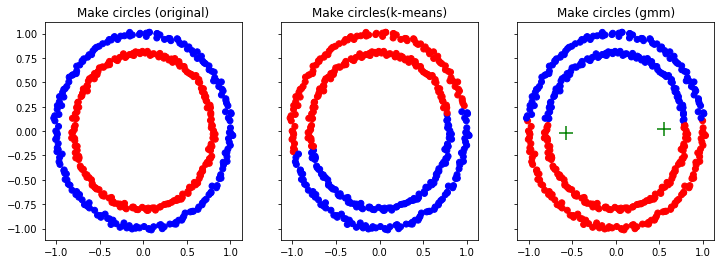

In [245]:
# make circles + gmm
gm_model = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="full")
df_circles['gmm'] = gm_model.fit_predict(elementos2)
util_grafico_comparacao_gmm("Make circles", df_circles)

# varianda entradas covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’},
gm_model_tied = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="tied")
df_circles['gmm'] = gm_model_tied.fit_predict(elementos2)
util_grafico_comparacao_gmm("Make circles", df_circles)

gm_model_diag = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="diag")
df_circles['gmm'] = gm_model_diag.fit_predict(elementos2)
util_grafico_comparacao_gmm("Make circles", df_circles)

gm_model_spherical = GaussianMixture(n_components=2, max_iter=1000, n_init=100, random_state=0, covariance_type="spherical")
df_circles['gmm'] = gm_model_spherical.fit_predict(elementos2)
util_grafico_comparacao_gmm("Make circles", df_circles)



### Parte III: Clustering Espectral

Outra família de algoritmos é a de Clustering Espectral. Essa família usa o espectro (eigenvalues) da matriz de similaridade de dados para aplicar uma redução de dimencionalidade antes de realizar o agrupamento. A Matriz de similaridades é um componente importante do processo de agrupamento, e indica a similaridade entre os elementos.

Após reduzir o número de dimensões, um algoritmo de clusterização tradicional é aplicado (tal como o k-means)

Detalhes em: https://en.wikipedia.org/wiki/Spectral_clustering.

Vamos fazer alguns testes:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


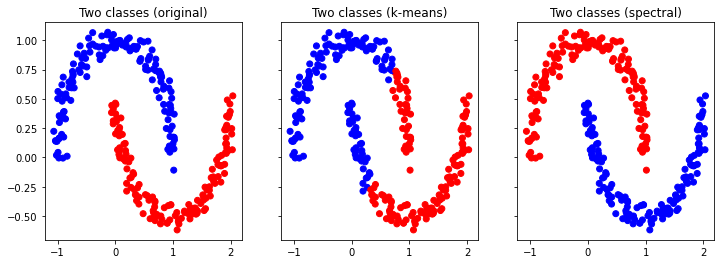

In [246]:
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot 

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans').fit(elementos1)
df_moons['spectral'] = model.labels_
# df_moons['spectral'].replace((0,1),(1,0),inplace=True)

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.scatter(df_moons['x'], df_moons['y'], c=df_moons['classe'], cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Two classes (original)")

ax2.scatter(df_moons['x'], df_moons['y'], c=df_moons['k-means'], cmap=pyplot.get_cmap('bwr'))
ax2.set_title("Two classes (k-means)")

ax3.scatter(df_moons['x'], df_moons['y'], c=df_moons['spectral'], cmap=pyplot.get_cmap('bwr'))
ax3.set_title("Two classes (spectral)")

pyplot.show()

**Exercício 2**: Avalie visualmente a capacidade de o algoritmo `SpectralClustering` em representar a estrutura dos diferentes conjuntos de dados gerados anteriormente (`make moons`, `make circles` e `Two classes`). Compare (visualmente) o resultado obtido por ele em cada um desses conjuntos de dados através de pares de figuras que contrastem o conjunto de dados com as categorias originais e as categorias sugeridas pelo resultado do agrupamento (são 3 figuras, cada uma contendo 2 subfiguras). 

In [247]:
def util_grafico_comparacao_spectral(label, df):
  fig, (ax1, ax3) = pyplot.subplots(1, 2, sharey=True, figsize=(8,4))
  ax1.scatter(df['x'], df['y'], c=df['classe'], cmap=pyplot.get_cmap('bwr'))
  ax1.set_title(label+" (original)")

  ax3.scatter(df['x'], df['y'], c=df['spectral'], cmap=pyplot.get_cmap('bwr'))
  ax3.set_title(label+" (spectral)")

  pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


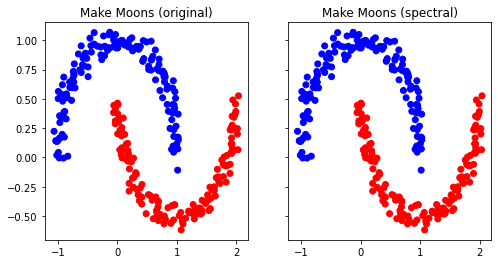

In [248]:
# make moons
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans').fit(elementos1)
df_moons['spectral'] = model.labels_

util_grafico_comparacao_spectral("Make Moons", df_moons)

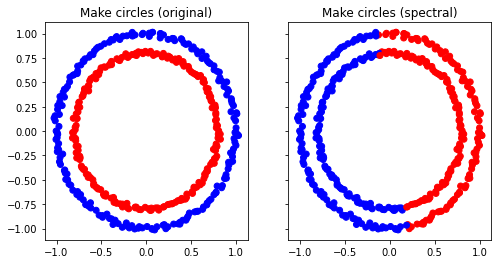

In [249]:
# make circles
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans').fit(elementos2)
df_circles['spectral'] = model.labels_

util_grafico_comparacao_spectral("Make circles", df_circles)

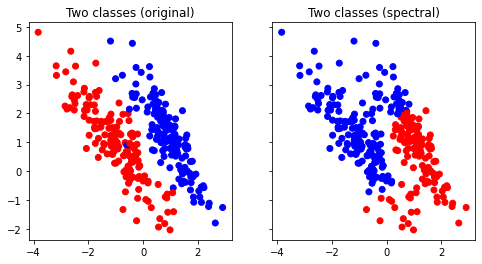

In [250]:
# two classes
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans').fit(elementos3)
df_classification['spectral'] = model.labels_

util_grafico_comparacao_spectral("Two classes", df_classification)


### Parte IV: Clustering baseado em Densidades

Neste caso, os conglomerados (*clusters*) são definidos como áreas de maior densidade (concentração) do que o restante do conjunto de dados. Elementos em áreas esparsas são geralmente considerados pontos de ruído ou fronteira (para separar os conglomerados).

O [`DBSCAN`](https://en.wikipedia.org/wiki/DBSCAN) é o método de *clustering* baseado em densidade mais popular existente. Ele é baseado em pontos de conexão dentro de certos limites de distância (os vizinhos mais próximos). No entanto, ele só conecta pontos que atendam a um critério de densidade. No algoritmo original, esse critério consiste em haver um número mínimo de objetos dentro de um limiar de distância (raio).

Um conglomerado consiste em todos os objetos conectados por densidade e incluindo todos os objetos que estão dentro do alcance desses objetos, podendo formar *clusters* de forma arbitrária. No DBSCAN, os *clusters* são formados a partir de regiões densas, separados por regiões de baixa ou nenhuma densidade.

O DBSCAN possui complexidade relativamente baixa e é deterministico em termos de pontos centrais e pontos de ruido, mas não determinístico para pontos de fronteira. 

Para funcionar, não é necessário indicar um número de *clusters* inicial, mas é necessário informar o raio de vizinhança e o número mínimo de elementos vizinhos necessários para formar *clusters*. 


A principal desvantagem do DBSCAN é que ele necessita de algum tipo de queda de densidade para detectar as bordas de um *cluster*. Em conjuntos de dados com com distribuições gaussianas sobrepostas, as bordas parecerão arbritrárias, já que a densidade diminui continuamente. Em um conjunto de dados que consiste em misturas de gaussianas, esses algoritmos são quase sempre superados por métodos de agrupamento baseados em modelos de distribuição.




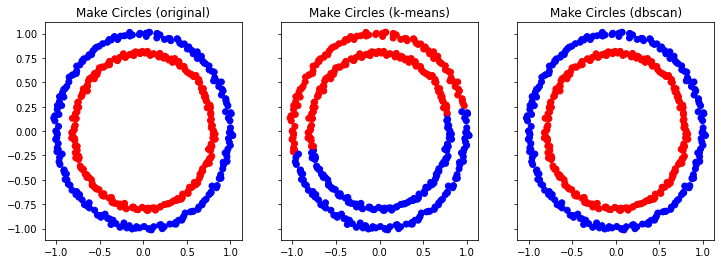

In [251]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot 

dbs_model = DBSCAN(eps=0.1, min_samples=4).fit(elementos2)
df_circles['dbscan'] = dbs_model.labels_

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.scatter(df_circles['x'], df_circles['y'], c=df_circles['classe'], cmap=pyplot.get_cmap('bwr'))
ax1.set_title("Make Circles (original)")

ax2.scatter(df_circles['x'], df_circles['y'], c=df_circles['k-means'], cmap=pyplot.get_cmap('bwr'))
ax2.set_title("Make Circles (k-means)")

ax3.scatter(df_circles['x'], df_circles['y'], c=df_circles['dbscan'], cmap=pyplot.get_cmap('bwr'))
ax3.set_title("Make Circles (dbscan)")

pyplot.show()

**Exercício 3**: Avalie visualmente a capacidade de o algoritmo `DBScan` em representar a estrutura dos diferentes conjuntos de dados gerados anteriormente (`make moons`, `make circles` e `Two classes`). Compare (visualmente) o resultado obtido por ele em cada um desses conjuntos de dados através de pares de figuras que contrastem o conjunto de dados com as categorias originais e as categorias sugeridas pelo resultado do agrupamento (são 3 figuras, cada uma contendo 2 subfiguras). 

In [252]:
# funcao util
def util_grafico_comparacao_dbscan(label, df):
  fig, (ax1, ax3) = pyplot.subplots(1, 2, sharey=True, figsize=(8,4))
  ax1.scatter(df['x'], df['y'], c=df['classe'], cmap=pyplot.get_cmap('bwr'))
  ax1.set_title(label+" (original)")
  
  ax3.scatter(df['x'], df['y'], c=df['dbscan'], cmap=pyplot.get_cmap('bwr'))
  ax3.set_title(label+" (dbscan)")

  pyplot.show()


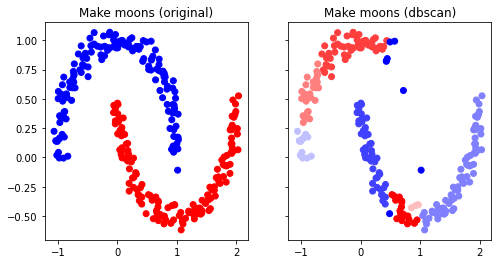

In [253]:
dbs_model = DBSCAN(eps=0.1, min_samples=4).fit(elementos1)
df_moons['dbscan'] = dbs_model.labels_

util_grafico_comparacao_dbscan("Make moons", df_moons)

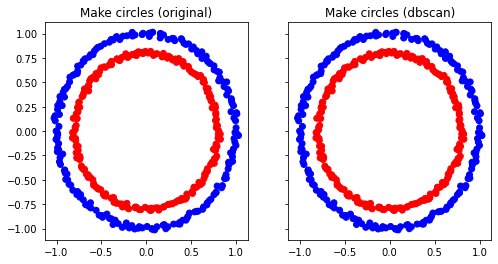

In [254]:
dbs_model = DBSCAN(eps=0.1, min_samples=4).fit(elementos2)
df_circles['dbscan'] = dbs_model.labels_

util_grafico_comparacao_dbscan("Make circles", df_circles)

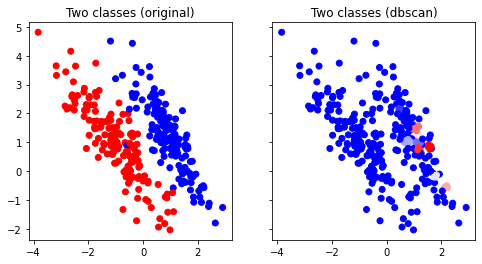

In [255]:
dbs_model = DBSCAN(eps=0.1, min_samples=4).fit(elementos3)
df_classification['dbscan'] = dbs_model.labels_

util_grafico_comparacao_dbscan("Two classes", df_classification)

**Exercício 04**: Análise comparativa do dataset `Iris`.

Utilizando o dataset `Iris` que utilizamos na aula anterior, realize uma análise comparativa envolvendo 1 algoritmo de cada família vista até o momento (por centroides, por modelos de distribuição, espectrais e baseados em densidade). Após aplicar cada algoritmo (considerando todas as 4 dimensões), gere uma tabela comparativa de seus resultados (considerando *acurácia*, *precisão*, *revocação* e *f-score* (como o *dataset* tem 4 dimensões, a análise visual não é necessária). Considere os subtipos de flor presentes no *dataset* como *baseline* para os cálculos e análises. Para os algoritmos que necessitam de um valor de `k`, considere 3 *clusters*.

In [256]:
import sklearn.datasets
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Carrega os dados e os apresenta em forma de tabela (dataset pandas)
data, target = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
data["target"] = target
dados = data.iloc[:, 0:4] # seleciona só as 4 primeiras colunas
dimensoes = dados.values  # dados vistos como arrays (para usar no kmeans)
data

# Scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dimensoes)

In [257]:
def inverte_valores(data_column, original, novo):
  # data[['gm']] = data[['gm']].replace(1, 4).replace(0,1).replace(4,0) # inverte label '0' com '1'
  data_column = data_column.replace(1, 4).replace(0,1).replace(4,0) # inverte label '0' com '1'
  data_column = data_column.replace(1, 4).replace(0,1).replace(4,0) # inverte label '0' com '1'

In [258]:
# gm
gm_model = GaussianMixture(n_components=3, random_state=42, covariance_type="full")
data['gm'] = gm_model.fit_predict(scaled_features)

# print(data)
# necessario trocar 1 por 0, 2 por 1, 0 por 2
# 0 > 5 > 2
# 1 > 6 > 0
# 2 > 7 > 1
data[['gm']] = data[['gm']].replace(0, 5)
data[['gm']] = data[['gm']].replace(1, 6)
data[['gm']] = data[['gm']].replace(2, 7)

data[['gm']] = data[['gm']].replace(5, 2)
data[['gm']] = data[['gm']].replace(6, 0)
data[['gm']] = data[['gm']].replace(7, 1)


print("Acurácia: ", accuracy_score(data['target'], data['gm']))
print(classification_report(data['target'], data['gm']))

Acurácia:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.90      0.95        50
           2       0.91      1.00      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [259]:
# spectral
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
data['spectral'] = spectral_model.fit_predict(scaled_features)

# print(data)
# necessario trocar 1 por 0, 2 por 1, 0 por 2
# 0 > 5 > 2
# 1 > 6 > 0
# 2 > 7 > 1
data[['spectral']] = data[['spectral']].replace(0, 5)
data[['spectral']] = data[['spectral']].replace(1, 6)
data[['spectral']] = data[['spectral']].replace(2, 7)

data[['spectral']] = data[['spectral']].replace(5, 2)
data[['spectral']] = data[['spectral']].replace(6, 0)
data[['spectral']] = data[['spectral']].replace(7, 1)

print("Acurácia: ", accuracy_score(data['target'], data['spectral']))
print(classification_report(data['target'], data['spectral']))

Acurácia:  0.8533333333333334
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.71      0.94      0.81        50
           2       0.91      0.64      0.75        50

    accuracy                           0.85       150
   macro avg       0.88      0.85      0.85       150
weighted avg       0.88      0.85      0.85       150



In [260]:
# dbscan
dbs_model = DBSCAN(eps=0.5, min_samples=10)
data['dbscan'] = dbs_model.fit_predict(scaled_features)

# rint(data)
# inverte_valores(data[['gm']], 0, 2)
print(data)

print("Acurácia: ", accuracy_score(data['target'], data['dbscan']))
print(classification_report(data['target'], data['dbscan']))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  gm  spectral  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
